In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import re
from IPython.display import display
import seaborn as sns # seaborn 데이터 가져오기 위해.
import matplotlib.pylab as plt

plt.rc('font', family='Malgun Gothic') # 한글의 폰트를 나눔고딕 사용
plt.rc('axes', unicode_minus=False)

In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
pd.set_option('max_columns', 100)

In [3]:
train = pd.read_csv('train.csv',encoding='cp949')
test = pd.read_csv('test.csv',encoding='cp949')
sub =  pd.read_csv('sample.csv',encoding='cp949')

## FE

In [4]:
cols = ['base_ym','접수년월',
'dsas_ltwt_gcd','질병경중등급코드',
'kcd_gcd','KCD등급코드',
'dsas_acd_rst_dcd','질병구분코드',
'ar_rclss_cd','발생지역구분코드',
'blrs_cd','치료행위코드',
'mdct_inu_rclss_dcd','의료기관구분코드',
'nur_hosp_yn','요양병원여부',
'isrd_age_dcd','고객나이구분코드',
'smrtg_5y_passed_yn','부담보5년경과여부',
'urlb_fc_yn','부실모집설계사계약여부',
'mtad_cntr_yn','중도부가계약여부',
'heltp_pf_ntyn','건강인우대계약가입여부',
'fds_cust_yn','보험사기이력고객여부',
'prm_nvcd','보험료구간코드',
'inamt_nvcd','가입금액구간코드',
'optt_nbtm_s','통원횟수',
'bilg_isamt_s','청구보험금',
'hspz_dys_s','입원일수',
'ac_ctr_diff','청구일계약일간기간구분코드',
'ac_rst_diff','청구일부활일간기간구분코드',
'hsp_avg_hspz_bilg_isamt_s','병원별평균입원청구보험금',
'hsp_avg_optt_bilg_isamt_s','병원별평균통원청구보험금',
'hsp_avg_surop_bilg_isamt_s','병원별평균수술청구보험금',
'hsp_avg_diag_bilg_isamt_s','병원별평균진단청구보험금',
'dsas_avg_hspz_bilg_isamt_s','질병별평균입원청구보험금',
'dsas_avg_optt_bilg_isamt_s','질병별평균통원청구보험금',
'dsas_avg_surop_bilg_isamt_s','질병별평균수술청구보험금',
'dsas_avg_diag_bilg_isamt_s','질병별평균진단청구보험금',
'hspz_blcnt_s','입원청구건수',
'surop_blcnt_s','수술청구건수',
'optt_blcnt_s','통원청구건수']

In [5]:
b_cols = []
a_cols = []
for i in range(len(cols)) : 
    if i %2 == 1 : 
        b_cols.append(cols[i])
    else : a_cols.append(cols[i])

In [6]:
len(train.columns)

34

In [7]:
len(cols)

64

In [8]:
train = train[a_cols]
train.columns = b_cols
# train = train.query("접수년월 == 201911")

In [9]:
test = test[a_cols]
test.columns = b_cols

In [10]:
train.head(7)

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수
0,201901,1,3,1,1,12,2,0,3,0,0,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0000,2.0
1,201901,3,8,22,4,2,1,1,4,0,0,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0000,0.0
2,201901,3,8,22,1,2,1,1,4,0,0,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0000,0.0
3,201901,3,8,23,2,8,2,0,9,0,0,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0000,0.0
4,201901,3,8,23,9,8,2,0,0,0,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0000,0.0
5,201901,1,3,1,4,10,2,0,5,0,0,0,0,0,1,2,0.0000,5.4654,1.9286,6,0,3.8136,0.1367,1.2725,1.2374,1.2612,1.2002,1.1701,0.9793,0.6667,3.1429,0.0
6,201901,1,3,1,1,8,3,0,3,0,0,0,0,0,1,4,0.0000,0.1882,0.2500,5,0,0.9925,2.0270,1.0346,0.4648,1.2612,1.2002,1.1701,0.9793,2.6667,0.0000,0.0


In [11]:
idx = train.index

In [12]:
data = pd.concat([train,test],axis=0)

In [13]:
data['재가입여부'] = data['청구일부활일간기간구분코드'].map(lambda x: 0 if x == 0 else 1)
data['총청구건수'] = data['입원청구건수'] + data['수술청구건수'] + data['통원청구건수']
data['통원_입원일수'] = data['통원횟수'] + data['입원일수']
# data['총청구건수구분'] = data['총청구건수'].map(lambda x: 0 if x <1 else 0)

def 치료행위(x):
    if x == 1:
        return [0,0,0,1]
    elif x == 2:
        return [0,0,1,0]
    elif x == 3:
        return [0,0,1,1]
    elif x==4:
        return [0,1,0,0]
    elif x == 5:
        return [0,1,0,1]
    elif x == 6:
        return [0,1,1,0]
    elif x == 7:
        return [0,1,1,1]
    elif x == 8:
        return [1,0,0,0]
    elif x == 9:
        return [1,0,0,1]
    elif x == 10:
        return [1,0,1,0]
    elif x == 11:
        return [1,0,1,1]
    elif x == 12:
        return [1,1,0,0]
    elif x == 13:
        return [1,1,0,1]
    elif x == 14:
        return [1,1,1,0]
    else:
        return [1,1,1,1]
    
치료행위_cate = np.zeros((data.shape[0],4))
data.index = range(len(data))
for i in range(data.shape[0]):
    치료행위_cate[i] = 치료행위(data['치료행위코드'][i])

In [14]:
def 입원(x) : 
    if x <= 7 : 
        return(0)
    else : return(1)
    
def 통원(x) : 
    if (x <= 3 or 8 <= x <= 11) : 
        return(0)
    else : return(1)
    
def 수술(x) : 
    if (x == 1 or 4 <= x <= 5 or 8 <= x <= 9 or 12 <= x <= 13) : 
        return(0)
    else : return(1)
    
def 진단(x) : 
    if (x % 2 == 1) : 
        return(1)
    else : return(0)

data['행위_입원'] = data['치료행위코드'].apply(입원)
data['행위_통원'] = data['치료행위코드'].apply(통원)
data['행위_수술'] = data['치료행위코드'].apply(수술)
data['행위_진단'] = data['치료행위코드'].apply(진단)

data['병원대비청구보험금'] = abs(data['청구보험금'] - (data['병원별평균입원청구보험금'] * data['행위_입원'] + data['병원별평균통원청구보험금'] * data['행위_통원'] + data['병원별평균수술청구보험금'] * data['행위_수술'] + data['병원별평균진단청구보험금'] * data['행위_진단']))
# data['질병대비청구보험금'] = abs(data['청구보험금'] - (data['질병별평균입원청구보험금'] * data['행위_입원'] + data['질병별평균통원청구보험금'] * data['행위_통원'] + data['질병별평균수술청구보험금'] * data['행위_수술'] + data['질병별평균진단청구보험금'] * data['행위_진단']))

In [15]:
train['target'] = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv').loc[idx]['target']

FileNotFoundError: [Errno 2] File b'/content/drive/My Drive/Colab Notebooks/\xe1\x84\x86\xe1\x85\xb5\xe1\x84\x85\xe1\x85\xa2\xe1\x84\x8b\xe1\x85\xa6\xe1\x84\x89\xe1\x85\xa6\xe1\x86\xba/data/train.csv' does not exist: b'/content/drive/My Drive/Colab Notebooks/\xe1\x84\x86\xe1\x85\xb5\xe1\x84\x85\xe1\x85\xa2\xe1\x84\x8b\xe1\x85\xa6\xe1\x84\x89\xe1\x85\xa6\xe1\x86\xba/data/train.csv'

In [ ]:
# data = pd.get_dummies(data,
#                      columns = ['질병경중등급코드','KCD등급코드','질병구분코드','발생지역구분코드','치료행위코드','의료기관구분코드','고객나이구분코드','보험료구간코드','가입금액구간코드','청구일계약일간기간구분코드','청구일부활일간기간구분코드'])

In [ ]:
# data['질병고려청구보험금'] = data['청구보험금'] / (1/(data['질병경중등급코드'] + (1/28 *data['질병구분코드'])))

In [ ]:
# data = pd.get_dummies(data,columns=['발생지역구분코드'])

In [16]:
def 입원(x) : 
    if x <= 7 : 
        return(0)
    else : return(1)
    
def 통원(x) : 
    if (x <= 3 or 8 <= x <= 11) : 
        return(0)
    else : return(1)
    
def 수술(x) : 
    if (x == 1 or 4 <= x <= 5 or 8 <= x <= 9 or 12 <= x <= 13) : 
        return(0)
    else : return(1)
    
def 진단(x) : 
    if (x % 2 == 1) : 
        return(1)
    else : return(0)

data['행위_입원'] = data['치료행위코드'].apply(입원)
data['행위_통원'] = data['치료행위코드'].apply(통원)
data['행위_수술'] = data['치료행위코드'].apply(수술)
data['행위_진단'] = data['치료행위코드'].apply(진단)

data['병원대비청구보험금'] = abs(data['청구보험금'] - (data['병원별평균입원청구보험금'] * data['행위_입원'] + data['병원별평균통원청구보험금'] * data['행위_통원'] + data['병원별평균수술청구보험금'] * data['행위_수술'] + data['병원별평균진단청구보험금'] * data['행위_진단']))
# data['질병대비청구보험금'] = abs(data['청구보험금'] - (data['질병별평균입원청구보험금'] * data['행위_입원'] + data['질병별평균통원청구보험금'] * data['행위_통원'] + data['질병별평균수술청구보험금'] * data['행위_수술'] + data['질병별평균진단청구보험금'] * data['행위_진단']))
data['병원별_평균_청구액'] = (data[['행위_입원','행위_통원','행위_수술','행위_진단']].values * data[['병원별평균입원청구보험금','병원별평균통원청구보험금','병원별평균수술청구보험금','병원별평균진단청구보험금']].values).sum(axis=1)
data['질병별_평균_청구액'] = (data[['행위_입원','행위_통원','행위_수술','행위_진단']].values * data[['질병별평균입원청구보험금','질병별평균통원청구보험금','질병별평균수술청구보험금','질병별평균진단청구보험금']].values).sum(axis=1)
# data['청구-병원평균청구'] = data['청구보험금'] - data['병원별_평균_청구액']
data['청구-질병평균청구'] = data['청구보험금'] - data['질병별_평균_청구액']

In [17]:
def 입원(x) : 
    if x <= 7 : 
        return(0)
    else : return(1)
    
def 통원(x) : 
    if (x <= 3 or 8 <= x <= 11) : 
        return(0)
    else : return(1)
    
def 수술(x) : 
    if (x == 1 or 4 <= x <= 5 or 8 <= x <= 9 or 12 <= x <= 13) : 
        return(0)
    else : return(1)
    
def 진단(x) : 
    if (x % 2 == 1) : 
        return(1)
    else : return(0)

data['행위_입원'] = data['치료행위코드'].apply(입원)
data['행위_통원'] = data['치료행위코드'].apply(통원)
data['행위_수술'] = data['치료행위코드'].apply(수술)
data['행위_진단'] = data['치료행위코드'].apply(진단)

data['병원대비청구보험금'] = abs(data['청구보험금'] - (data['병원별평균입원청구보험금'] * data['행위_입원'] + data['병원별평균통원청구보험금'] * data['행위_통원'] + data['병원별평균수술청구보험금'] * data['행위_수술'] + data['병원별평균진단청구보험금'] * data['행위_진단']))
# data['질병대비청구보험금'] = abs(data['청구보험금'] - (data['질병별평균입원청구보험금'] * data['행위_입원'] + data['질병별평균통원청구보험금'] * data['행위_통원'] + data['질병별평균수술청구보험금'] * data['행위_수술'] + data['질병별평균진단청구보험금'] * data['행위_진단']))
data['병원별_평균_청구액'] = (data[['행위_입원','행위_통원','행위_수술','행위_진단']].values * data[['병원별평균입원청구보험금','병원별평균통원청구보험금','병원별평균수술청구보험금','병원별평균진단청구보험금']].values).sum(axis=1)
data['질병별_평균_청구액'] = (data[['행위_입원','행위_통원','행위_수술','행위_진단']].values * data[['질병별평균입원청구보험금','질병별평균통원청구보험금','질병별평균수술청구보험금','질병별평균진단청구보험금']].values).sum(axis=1)
# data['청구-병원평균청구'] = data['청구보험금'] - data['병원별_평균_청구액']
data['청구-질병평균청구'] = data['청구보험금'] - data['질병별_평균_청구액']

features = []
f = train.groupby(['가입금액구간코드','발생지역구분코드'])['청구보험금'].agg([('m2','mean')]).reset_index()
features.append(f)
for f in features : 
    data = pd.merge(data,f,how='left',on=['가입금액구간코드','발생지역구분코드'])
    
data['diffs2'] = abs(data['m2'] - data['청구보험금'])

In [18]:
# 87.27 > 86.87

# def get_99_col(df,col):
#   data99=[]
#   for value in df[col].values:
#     if value==99:
#       data99.append(1)
#     else:
#       data99.append(0)
#   return data99

# data['is_month_99']=get_99_col(data,'보험료구간코드')


# # negative
# data['negative']=data['is_month_99'] + data['행위_진단']+ data['보험사기이력고객여부'] 

In [19]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', '재가입여부', '총청구건수', '통원_입원일수', '행위_입원', '행위_통원', '행위_수술',
       '행위_진단', '병원대비청구보험금', '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'm2',
       'diffs2'],
      dtype='object')

In [389]:
# 87.27 > 86.3(범주합치기)
# data['발생지역구분코드'] = data['발생지역구분코드'].map({6:2})

In [20]:
data

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,재가입여부,총청구건수,통원_입원일수,행위_입원,행위_통원,행위_수술,행위_진단,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,m2,diffs2
0,201901,1,3,1,1,12,2,0,3,0,0,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0000,2.0,0,12.0000,1.2023,1,1,0,0,1.3084,1.7324,2.4614,-2.0374,1.898202,1.474202
1,201901,3,8,22,4,2,1,1,4,0,0,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0000,0.0,0,1.0000,0.0000,0,0,1,0,0.2832,0.5770,0.1508,0.7094,1.273116,0.412916
2,201901,3,8,22,1,2,1,1,4,0,0,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0000,0.0,0,1.0000,0.0000,0,0,1,0,0.1416,0.2885,0.1508,0.2793,1.962564,1.532464
3,201901,3,8,23,2,8,2,0,9,0,0,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0000,0.0,0,1.4444,0.8056,1,0,0,0,0.3129,0.5638,0.1920,0.0589,1.607627,1.356727
4,201901,3,8,23,9,8,2,0,0,0,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0000,0.0,0,1.3333,0.4167,1,0,0,0,0.4141,0.4464,0.1920,-0.1597,1.306105,1.273805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201912,3,4,28,1,2,1,1,2,0,0,0,0,0,1,6,0.0000,0.3226,0.0000,6,0,0.0267,0.0000,0.1975,0.0000,0.1309,0.0000,0.1397,0.0000,0.0000,1.0000,0.0,0,1.0000,0.0000,0,0,1,0,0.1251,0.1975,0.1397,0.1829,1.962564,1.639964
399996,201912,3,14,27,1,8,2,0,2,0,0,0,0,0,1,2,0.0000,0.0000,0.0000,6,6,0.9098,0.0000,0.5815,0.0000,0.1309,0.0000,0.1397,0.0000,0.6667,0.0000,0.0,1,0.6667,0.0000,1,0,0,0,0.9098,0.9098,0.1309,-0.1309,2.086128,2.086128
399997,201912,3,8,22,2,2,1,1,5,0,0,0,0,0,1,2,0.0000,0.2165,0.0000,4,0,0.0000,0.0000,0.0741,0.0000,0.0072,0.0000,0.1462,0.0000,0.0000,2.0000,0.0,0,2.0000,0.0000,0,0,1,0,0.1424,0.0741,0.1462,0.0703,1.812612,1.596112
399998,201912,1,3,1,1,1,2,0,4,0,0,0,0,0,1,4,0.0000,4.6630,0.0000,5,0,1.3442,1.7263,1.8482,0.8596,0.8726,0.8690,0.9450,0.8077,0.0000,0.6732,0.0,0,0.6732,0.0000,0,0,0,1,3.8034,0.8596,0.8077,3.8553,1.898202,2.764798


In [391]:
data.query('행위_입원==0 & 입원청구건수!=0')

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,재가입여부,총청구건수,통원_입원일수,행위_입원,행위_통원,행위_수술,행위_진단,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,m2,diffs2
50320,201907,2,2,7,4,6,2,0,2,0,0,0,0,0,1,6,0.7819,0.1263,0.5075,5,0,1.0052,0.7804,0.8727,0.4796,0.8555,0.0246,0.8813,0.000,0.4060,0.0000,0.3909,0,0.7969,1.2894,0,1,1,0,1.5268,1.6531,0.9059,-0.7796,1.424081,1.297781
50359,201903,3,13,17,4,7,2,0,4,0,0,0,0,0,1,4,0.4468,0.5756,0.8777,6,0,2.0367,0.1369,0.3964,0.3131,0.5601,0.0945,0.1227,0.000,0.4681,0.2979,0.2979,0,1.0639,1.3245,0,1,1,1,0.2708,0.8464,0.2172,0.3584,1.273116,0.697516
50914,201908,3,13,17,5,6,2,0,1,0,0,0,0,0,99,99,0.0000,0.8980,1.3063,0,0,1.4390,0.0000,0.1043,0.1561,0.5656,0.3887,0.1529,0.000,0.5225,0.2162,0.0000,0,0.7387,1.3063,0,1,1,0,0.7937,0.1043,0.5416,0.3564,2.141442,1.243442
51049,201903,3,9,20,1,5,2,0,4,0,0,0,0,0,1,1,0.0000,0.0936,0.3769,6,0,18.4203,0.0000,0.0893,0.0000,0.4159,0.0611,0.1277,0.000,0.8615,0.3539,0.0000,0,1.2154,0.3769,0,1,0,1,0.0936,0.0000,0.0611,0.0325,1.747292,1.653692
52313,201905,3,14,26,1,3,2,0,9,0,0,1,0,0,10,5,0.0000,0.4781,0.1036,6,0,0.6856,0.1630,1.1617,0.9707,0.1734,0.0000,0.1547,0.000,0.2072,0.6892,0.0000,0,0.8964,0.1036,0,0,1,1,1.6543,2.1324,0.1547,0.3234,2.503943,2.025843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396664,201912,3,4,28,1,7,2,0,4,0,0,0,0,0,1,2,0.0000,0.5407,0.6504,6,0,0.9646,0.9101,0.6813,0.5898,0.1309,0.0000,0.1397,0.000,0.3854,0.4219,0.8437,0,1.6510,0.6504,0,1,1,1,1.6405,2.1812,0.1397,0.4010,2.086128,1.545428
397787,201912,3,14,26,1,6,2,0,3,0,0,0,0,0,2,11,0.0000,0.2632,0.1867,6,0,0.4763,0.0000,0.1604,0.0000,0.1440,0.0000,0.1504,0.000,0.1494,0.7759,0.7759,0,1.7012,0.1867,0,1,1,0,0.1028,0.1604,0.1504,0.1128,1.194891,0.931691
399032,201912,3,14,26,1,6,2,0,3,0,0,0,0,0,2,11,0.0000,0.2256,0.0408,6,0,0.1041,0.0000,0.1478,0.0000,0.1338,0.0000,0.1420,0.000,0.0327,0.9510,0.9510,0,1.9347,0.0408,0,1,1,0,0.0778,0.1478,0.1420,0.0836,1.194891,0.969291
399148,201912,3,5,16,2,5,1,0,4,0,0,0,0,0,1,4,0.0000,0.7528,0.7982,5,0,0.2465,0.0000,0.0000,0.0445,1.0015,0.0000,1.1139,0.134,0.4561,0.0000,0.0000,0,0.4561,0.7982,0,1,0,1,0.7083,0.0445,0.1340,0.6188,1.475029,0.722229


In [392]:
data.query('(행위_통원==0 & 통원횟수!=0) | (행위_입원==0 & 입원청구건수!=0)').index

Int64Index([ 50320,  50359,  50914,  51049,  52313,  52909,  53041,  54932,
             55175,  55229,
            ...
            397406, 397412, 397759, 397787, 398179, 398539, 398916, 399032,
            399148, 399363],
           dtype='int64', length=1930)

In [393]:
train.query('보험료구간코드==99')['target'].value_counts()

2    22550
1    10367
0     1519
Name: target, dtype: int64

In [394]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', '재가입여부', '총청구건수', '통원_입원일수', '행위_입원', '행위_통원', '행위_수술',
       '행위_진단', '병원대비청구보험금', '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'm2',
       'diffs2'],
      dtype='object')

In [395]:
# def unknown99(x):
#   if x==99:
#     return(1)
#   else:
#     return(0)

# def unknown9(x):
#   if x==9:
#     return(1)
#   else:
#     return(0)

# data['보험료_nan'] = data['보험료구간코드'].apply(unknown99)
# data['가입금액_nan'] = data['가입금액구간코드'].apply(unknown99)

# data['지역_nan'] = data['발생지역구분코드'].apply(unknown9)
# data['의료기관_nan'] = data['의료기관구분코드'].apply(unknown9)

# data['unknown합'] = data['보험료_nan'] + data['가입금액_nan'] + data['지역_nan'] + data['의료기관_nan']

In [396]:
# data['질병청구합'] = data['질병별평균입원청구보험금'] + data['질병별평균통원청구보험금'] + data['질병별평균수술청구보험금'] + data['질병별평균진단청구보험금']
# data['병원청구합'] = data['병원별평균입원청구보험금'] + data['병원별평균통원청구보험금'] + data['병원별평균수술청구보험금'] + data['병원별평균진단청구보험금']

# data['질병howfar'] = data['질병청구합'] - data['청구보험금'] 
# data['병원howfar'] = data['병원청구합'] - data['청구보험금'] # knn에선 두개 같이쓰는게좋음

#  # 플러스일수록 자동지급 높을 가능성(평균보다 보험금 청구 적게함) # 근데 0인경우 고려해야함
# ## 엑트에선 떨어짐

In [397]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', '재가입여부', '총청구건수', '통원_입원일수', '행위_입원', '행위_통원', '행위_수술',
       '행위_진단', '병원대비청구보험금', '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'm2',
       'diffs2'],
      dtype='object')

In [398]:
# 떡락 
# d = data.groupby(['질병구분코드'])['청구보험금'].mean().to_dict()
# data['질병구분평균'] = data['질병구분코드'].apply(lambda x: d.get(x))

# d = data.groupby(['가입금액구간코드'])['청구보험금'].mean().to_dict()
# data['가입금액평균'] = data['질병구분코드'].apply(lambda x: d.get(x))

# d = data.groupby(['보험료구간코드'])['청구보험금'].mean().to_dict()
# data['보험료구간평균'] = data['보험료구간코드'].apply(lambda x: d.get(x))

# d = data.groupby(['발생지역구분코드'])['청구보험금'].mean().to_dict()
# data['발생지역평균'] = data['보험료구간코드'].apply(lambda x: d.get(x))

# d = data.groupby(['고객나이구분코드'])['청구보험금'].mean().to_dict()
# data['고객나이평균'] = data['보험료구간코드'].apply(lambda x: d.get(x))

# # #####################
# data['질병구분howfar'] = data['질병구분평균'] - data['청구보험금'] # 플러스일수록 자동지급 가능성이 높음
# data['가입금액howfar'] = data['가입금액평균'] - data['청구보험금']
# data['보험료howfar'] = data['보험료구간평균'] - data['청구보험금']
# data['발생지역howfar'] = data['발생지역평균'] - data['청구보험금']
# data['고객나이howfar'] = data['고객나이평균'] - data['청구보험금']

In [399]:
features = []

In [400]:
data = data.fillna(0)

In [401]:
data.index = range(len(data))

In [402]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', '재가입여부', '총청구건수', '통원_입원일수', '행위_입원', '행위_통원', '행위_수술',
       '행위_진단', '병원대비청구보험금', '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'm2',
       'diffs2'],
      dtype='object')

In [403]:
data.query('diffs2>80')

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,재가입여부,총청구건수,통원_입원일수,행위_입원,행위_통원,행위_수술,행위_진단,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,m2,diffs2
7579,201902,1,3,1,1,1,3,0,4,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.0074,0.7432,0.7573,2.8169,1.2123,1.0000,1.1730,1.0991,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,83.2046,2.8169,1.0991,84.9224,2.205674,83.815826
8619,201902,1,3,1,1,1,3,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.1310,1.7549,2.0680,0.9883,1.2123,1.0000,1.1730,1.0991,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,85.0332,0.9883,1.0991,84.9224,2.205674,83.815826
14571,201904,1,3,1,4,1,3,0,2,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.9153,0.0676,1.0262,1.7958,1.0579,1.2853,1.2206,1.0866,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,84.2257,1.7958,1.0866,84.9349,1.759569,84.261931
16452,201904,1,3,1,2,1,3,0,4,0,0,0,0,0,1,5,0.0,86.0215,0.0,5,0,1.9425,1.8086,1.1051,1.1585,1.0579,1.2853,1.2206,1.0866,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,84.8630,1.1585,1.0866,84.9349,2.244958,83.776542
17815,201905,1,3,1,1,1,2,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,0.0000,0.0000,0.8655,5.6338,1.1100,1.1369,1.0858,1.0988,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,80.3877,5.6338,1.0988,84.9227,2.205674,83.815826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384987,201912,1,3,1,4,1,3,0,2,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.1790,4.0541,2.4399,1.3877,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,84.6338,1.3877,1.1091,84.9124,1.759569,84.261931
385526,201912,1,3,1,1,1,3,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,0.7914,1.3198,1.9614,1.5628,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,84.4587,1.5628,1.1091,84.9124,2.205674,83.815826
387266,201912,1,3,1,1,1,3,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,0.7091,0.7392,1.8598,1.6000,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,84.4215,1.6000,1.1091,84.9124,2.205674,83.815826
390808,201912,1,3,1,3,1,3,0,2,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.1770,4.0404,2.4375,1.3885,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,84.6330,1.3885,1.1091,84.9124,2.060948,83.960552


In [404]:
data.query('보험사기이력고객여부==1')['청구보험금'].sort_values(ascending=False)

34496     30.8530
30020     27.5883
20669     22.9032
21271     21.5054
14923     21.5054
           ...   
349688     0.0000
30809      0.0000
349601     0.0000
349540     0.0000
264722     0.0000
Name: 청구보험금, Length: 11467, dtype: float64

In [405]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/미래에셋/all_data.csv')

In [406]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', 'target'],
      dtype='object')

In [407]:
def 입원(x) : 
    if x <= 7 : 
        return(0)
    else : return(1)
    
def 통원(x) : 
    if (x <= 3 or 8 <= x <= 11) : 
        return(0)
    else : return(1)
    
def 수술(x) : 
    if (x == 1 or 4 <= x <= 5 or 8 <= x <= 9 or 12 <= x <= 13) : 
        return(0)
    else : return(1)
    
def 진단(x) : 
    if (x % 2 == 1) : 
        return(1)
    else : return(0)

data['행위_입원'] = data['치료행위코드'].apply(입원)
data['행위_통원'] = data['치료행위코드'].apply(통원)
data['행위_수술'] = data['치료행위코드'].apply(수술)
data['행위_진단'] = data['치료행위코드'].apply(진단)

data['병원대비청구보험금'] = abs(data['청구보험금'] - (data['병원별평균입원청구보험금'] * data['행위_입원'] + data['병원별평균통원청구보험금'] * data['행위_통원'] + data['병원별평균수술청구보험금'] * data['행위_수술'] + data['병원별평균진단청구보험금'] * data['행위_진단']))
# data['질병대비청구보험금'] = abs(data['청구보험금'] - (data['질병별평균입원청구보험금'] * data['행위_입원'] + data['질병별평균통원청구보험금'] * data['행위_통원'] + data['질병별평균수술청구보험금'] * data['행위_수술'] + data['질병별평균진단청구보험금'] * data['행위_진단']))
data['병원별_평균_청구액'] = (data[['행위_입원','행위_통원','행위_수술','행위_진단']].values * data[['병원별평균입원청구보험금','병원별평균통원청구보험금','병원별평균수술청구보험금','병원별평균진단청구보험금']].values).sum(axis=1)
data['질병별_평균_청구액'] = (data[['행위_입원','행위_통원','행위_수술','행위_진단']].values * data[['질병별평균입원청구보험금','질병별평균통원청구보험금','질병별평균수술청구보험금','질병별평균진단청구보험금']].values).sum(axis=1)
# data['청구-병원평균청구'] = data['청구보험금'] - data['병원별_평균_청구액']

data['청구-질병평균청구'] = data['청구보험금'] - data['질병별_평균_청구액']

features = []
f = train.groupby(['가입금액구간코드','발생지역구분코드'])['청구보험금'].agg([('m2','mean')]).reset_index()
features.append(f)
for f in features : 
    data = pd.merge(data,f,how='left',on=['가입금액구간코드','발생지역구분코드'])
    
data['diffs2'] = abs(data['m2'] - data['청구보험금'])

In [408]:
data.query('diffs2>80')

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target,행위_입원,행위_통원,행위_수술,행위_진단,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,m2,diffs2
7579,201902,1,3,1,1,1,3,0,4,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.0074,0.7432,0.7573,2.8169,1.2123,1.0000,1.1730,1.0991,0.0,0.0,0.0,1,0,0,0,1,83.2046,2.8169,1.0991,84.9224,2.205674,83.815826
8619,201902,1,3,1,1,1,3,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.1310,1.7549,2.0680,0.9883,1.2123,1.0000,1.1730,1.0991,0.0,0.0,0.0,1,0,0,0,1,85.0332,0.9883,1.0991,84.9224,2.205674,83.815826
14571,201904,1,3,1,4,1,3,0,2,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.9153,0.0676,1.0262,1.7958,1.0579,1.2853,1.2206,1.0866,0.0,0.0,0.0,1,0,0,0,1,84.2257,1.7958,1.0866,84.9349,1.759569,84.261931
16452,201904,1,3,1,2,1,3,0,4,0,0,0,0,0,1,5,0.0,86.0215,0.0,5,0,1.9425,1.8086,1.1051,1.1585,1.0579,1.2853,1.2206,1.0866,0.0,0.0,0.0,1,0,0,0,1,84.8630,1.1585,1.0866,84.9349,2.244958,83.776542
17815,201905,1,3,1,1,1,2,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,0.0000,0.0000,0.8655,5.6338,1.1100,1.1369,1.0858,1.0988,0.0,0.0,0.0,1,0,0,0,1,80.3877,5.6338,1.0988,84.9227,2.205674,83.815826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384987,201912,1,3,1,4,1,3,0,2,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.1790,4.0541,2.4399,1.3877,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,1,0,0,0,1,84.6338,1.3877,1.1091,84.9124,1.759569,84.261931
385526,201912,1,3,1,1,1,3,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,0.7914,1.3198,1.9614,1.5628,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,1,0,0,0,1,84.4587,1.5628,1.1091,84.9124,2.205674,83.815826
387266,201912,1,3,1,1,1,3,0,3,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,0.7091,0.7392,1.8598,1.6000,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,1,0,0,0,1,84.4215,1.6000,1.1091,84.9124,2.205674,83.815826
390808,201912,1,3,1,3,1,3,0,2,0,0,0,0,0,1,3,0.0,86.0215,0.0,6,0,1.1770,4.0404,2.4375,1.3885,1.1660,1.1593,1.2975,1.1091,0.0,0.0,0.0,1,0,0,0,1,84.6330,1.3885,1.1091,84.9124,2.060948,83.960552


In [409]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', 'target', '행위_입원', '행위_통원', '행위_수술', '행위_진단', '병원대비청구보험금',
       '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'm2', 'diffs2'],
      dtype='object')

<Figure size 792x360 with 0 Axes>

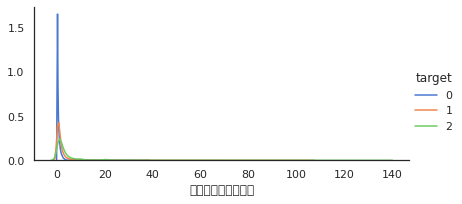

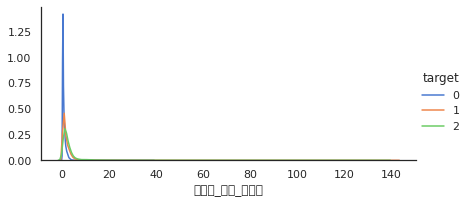

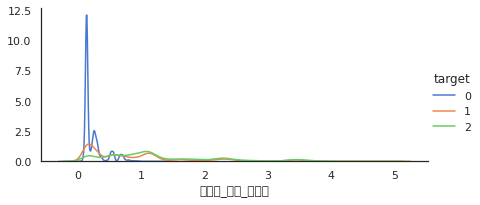

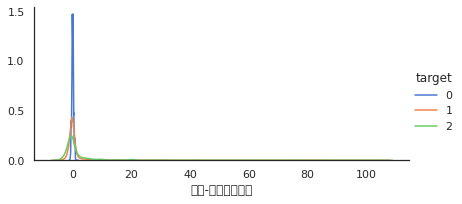

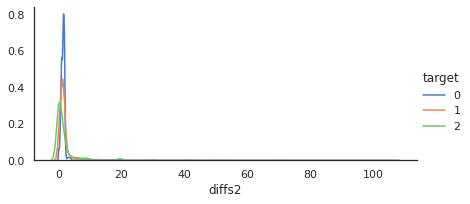

In [410]:
import matplotlib.pyplot as plt # 시각화
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set_palette("muted")
import warnings
warnings.filterwarnings('ignore')

# 평균과의 차이를 나타내는 변수들
dis_price_col = ['병원대비청구보험금', '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'diffs2', 'target']
about_price = data[dis_price_col]
plt.figure(figsize=(11,5))
for i in ['병원대비청구보험금', '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'diffs2']:
    facet = sns.FacetGrid(about_price, hue='target', size=3, aspect=2)
    facet.map(sns.kdeplot, i)
    facet.add_legend()
    plt.show()

In [411]:
train['입원청구건수'].sort_values()

91203      0.0000
105955     0.0000
105954     0.0000
267728     0.0000
105950     0.0000
           ...   
188652    32.8092
23173     33.3333
183236    33.5490
251204    33.5520
27431     35.3333
Name: 입원청구건수, Length: 377928, dtype: float64

In [412]:
train.head()

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target
0,201901,1,3,1,1,12,2,0,3,0,0,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,1
1,201901,3,8,22,4,2,1,1,4,0,0,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0
2,201901,3,8,22,1,2,1,1,4,0,0,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,1
3,201901,3,8,23,2,8,2,0,9,0,0,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,1
4,201901,3,8,23,9,8,2,0,0,0,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,1


In [413]:
train.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', 'target'],
      dtype='object')

In [414]:
train['입원일수'].sort_values()

305732      0.0000
299188      0.0000
122147      0.0000
122153      0.0000
122154      0.0000
            ...   
327421    417.0833
323489    417.0833
345264    417.0833
336063    417.0833
356488    417.0833
Name: 입원일수, Length: 377928, dtype: float64

In [8]:
a = train.query('가입금액구간코드==99')['청구보험금'].sort_values().value_counts()/len(train.query('가입금액구간코드==99'))

In [9]:
b = train.query('청구보험금==0')['가입금액구간코드'].sort_values().value_counts()/len(train.query('청구보험금==0'))

In [10]:
aa = pd.DataFrame(a, columns={'청구보험금'}).reset_index().rename(columns={'index':'해당 청구보험금', '청구보험금':'가입금액 99인 비율'})

In [11]:
aaa = aa.head(10)

In [12]:
aaa

,해당 청구보험금,가입금액 99인 비율
0,0.0000,0.755692
1,10.7527,0.003310
2,0.4301,0.001859
3,0.2151,0.001771
4,0.3226,0.001684
5,1.0753,0.001045
6,21.5054,0.001045
7,0.0538,0.000958
8,0.6452,0.000929
9,0.1075,0.000871


In [420]:
len(a)

6404

In [421]:
train.query('가입금액구간코드==99')

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target
7,201901,1,9,6,9,10,3,0,7,0,0,0,0,0,99,99,0.0,0.0,0.3333,0,0,0.9925,2.0270,1.0346,0.4648,2.0129,0.0473,1.2470,0.8507,2.0000,2.0000,0.0,2
50,201901,3,4,28,9,2,2,0,7,0,0,0,0,0,99,99,0.0,0.0,0.0000,0,0,0.5503,0.2703,0.2002,0.0000,0.1118,0.0000,0.1368,0.0000,0.0000,1.0000,0.0,1
96,201901,3,8,22,9,2,1,1,7,0,0,0,0,0,99,99,0.0,0.0,0.0000,0,0,0.0000,0.0000,0.4074,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,2.0000,0.0,1
105,201901,2,5,10,9,8,2,1,7,0,0,0,0,1,99,99,0.0,0.0,2.5833,0,0,2.8645,0.0000,0.0000,0.0000,0.6341,0.0000,0.5966,0.0000,0.6667,0.0000,0.0,2
108,201901,3,13,17,9,8,3,0,7,0,0,0,0,1,99,99,0.0,0.0,1.7500,0,0,2.2777,1.4929,1.9339,0.7925,0.5008,0.1080,0.1481,0.0000,1.3333,0.0000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377919,201905,1,9,5,9,10,2,0,7,0,0,0,0,0,99,99,0.0,0.0,0.2847,0,0,0.5315,0.0751,1.2612,0.0000,0.7838,0.0000,1.2684,0.9001,0.6667,1.0000,0.0,2
377920,201902,1,3,1,9,8,2,0,7,0,0,0,0,0,99,99,0.0,0.0,0.0000,0,0,0.8582,1.2368,1.7078,0.7156,1.1946,1.1276,1.2075,1.0364,10.9235,0.7081,0.0,2
377922,201908,1,6,8,9,8,2,0,7,0,0,0,0,0,99,99,0.0,0.0,10.1482,0,0,3.0453,0.0000,0.0000,0.0000,0.9968,0.0000,0.7670,0.2268,3.3702,0.0000,0.0,2
377924,201904,1,3,1,9,9,2,0,7,0,0,0,0,0,99,99,0.0,0.0,1.7434,0,6,0.7844,2.3047,1.2993,0.5585,1.0199,1.2228,1.1811,1.0761,6.6667,0.7896,0.0,2


In [422]:
train.query('가입금액구간코드==99 & 발생지역구분코드==9 ')

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,중도부가계약여부,건강인우대계약가입여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target
7,201901,1,9,6,9,10,3,0,7,0,0,0,0,0,99,99,0.0,0.0,0.3333,0,0,0.9925,2.0270,1.0346,0.4648,2.0129,0.0473,1.2470,0.8507,2.0000,2.0000,0.0,2
50,201901,3,4,28,9,2,2,0,7,0,0,0,0,0,99,99,0.0,0.0,0.0000,0,0,0.5503,0.2703,0.2002,0.0000,0.1118,0.0000,0.1368,0.0000,0.0000,1.0000,0.0,1
96,201901,3,8,22,9,2,1,1,7,0,0,0,0,0,99,99,0.0,0.0,0.0000,0,0,0.0000,0.0000,0.4074,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,2.0000,0.0,1
105,201901,2,5,10,9,8,2,1,7,0,0,0,0,1,99,99,0.0,0.0,2.5833,0,0,2.8645,0.0000,0.0000,0.0000,0.6341,0.0000,0.5966,0.0000,0.6667,0.0000,0.0,2
108,201901,3,13,17,9,8,3,0,7,0,0,0,0,1,99,99,0.0,0.0,1.7500,0,0,2.2777,1.4929,1.9339,0.7925,0.5008,0.1080,0.1481,0.0000,1.3333,0.0000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377919,201905,1,9,5,9,10,2,0,7,0,0,0,0,0,99,99,0.0,0.0,0.2847,0,0,0.5315,0.0751,1.2612,0.0000,0.7838,0.0000,1.2684,0.9001,0.6667,1.0000,0.0,2
377920,201902,1,3,1,9,8,2,0,7,0,0,0,0,0,99,99,0.0,0.0,0.0000,0,0,0.8582,1.2368,1.7078,0.7156,1.1946,1.1276,1.2075,1.0364,10.9235,0.7081,0.0,2
377922,201908,1,6,8,9,8,2,0,7,0,0,0,0,0,99,99,0.0,0.0,10.1482,0,0,3.0453,0.0000,0.0000,0.0000,0.9968,0.0000,0.7670,0.2268,3.3702,0.0000,0.0,2
377924,201904,1,3,1,9,9,2,0,7,0,0,0,0,0,99,99,0.0,0.0,1.7434,0,6,0.7844,2.3047,1.2993,0.5585,1.0199,1.2228,1.1811,1.0761,6.6667,0.7896,0.0,2


In [423]:
b = train.query('청구보험금==0')['가입금액구간코드'].sort_values().value_counts()/len(train.query('청구보험금==0'))

In [424]:
bb = pd.DataFrame(b).reset_index().rename(columns={'index':'해당 가입금액', '가입금액구간코드':'청구 보험금 0인 비율'})

In [425]:
bb

,해당 가입금액,청구 보험금 0인 비율
0,99,0.930024
1,2,0.021264
2,4,0.015546
3,3,0.010650
4,6,0.006254
5,11,0.005682
6,5,0.004110
7,1,0.003467
8,7,0.001430
9,8,0.000751


In [426]:
train.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', 'target'],
      dtype='object')

# 여기부터

# plot에 사용할 수 있는 인자 
| 스타일 문자열 | 약자 | 의미 |
|-|-|-|
| `color` | `c`  | 선 색깔 |
| `linewidth` | `lw` | 선 굵기 |
| `linestyle` | `ls` | 선 스타일 |
| `marker` |   | 마커 종류 |
| `markersize` | `ms`  | 마커 크기 |
| `markeredgecolor` | `mec`   |	마커 선 색깔 |
| `markeredgewidth` | `mew`   |	마커 선 굵기 |
| `markerfacecolor` | `mfc`   |	마커 내부 색깔 |

# marker 사용하는 인자 
| 마커 문자열 | 의미 |
|-|-|
| `.` | point marker  |
| `,` | pixel marker |
| `o` | circle marker |
| `v` | triangle_down marker |
| `^` | triangle_up marker |
| `<` | triangle_left marker |
| `>` | triangle_right marker |
| `1` | tri_down marker |
| `2` | tri_up marker |
| `3` | tri_left marker |
| `4` | tri_right marker |
| `s` | square marker |
| `p` | pentagon marker |
| `*` | star marker |
| `h` | hexagon1 marker |
| `H` | hexagon2 marker |
| `+` | plus marker |
| `x` | x marker |
| `D` | diamond marker |
| `d` | thin_diamond marker |

# 색깔 사용 인자 
| 문자열 | 약자 |
|-|-|
| `blue` | `b` |
| `green` | `g` |
| `red` | `r` |
| `cyan` | `c` |
| `magenta` | `m` |
| `yellow` | `y` |
| `black` | `k` |
| `white` | `w` |

전체 색깔 목록(named color)은 다음과 같다.

<img align="left" src="https://matplotlib.org/_images/named_colors.png" alt="matplotlib color">

# ls 인자
| 선 스타일 문자열 | 의미 |
|-|-|
| `-` |  solid line style
| `--` |  dashed line style
| `-.` |  dash-dot line style
| `:` |  dotted line style

In [10]:
a = pd.pivot_table(data=train, index='접수년월', values='청구보험금', columns='질병구분코드', aggfunc='count')

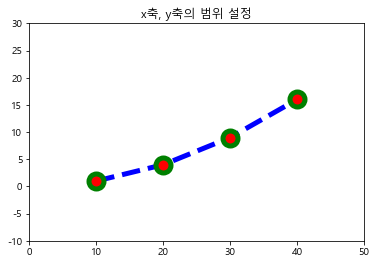

In [14]:
plt.title("x축, y축의 범위 설정")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r") # 인자에 대한 설명은 밑에 달아놓았음.
plt.xlim(0, 50) # x축의 범위를 0~50까지
plt.ylim(-10, 30) # y축의 범위를 -10 ~ 30 까지

# 위의 두 문장을 plt.axis((0, 50, -10, 30))로 대체해도 동일한 결과를 얻는다.

plt.show()

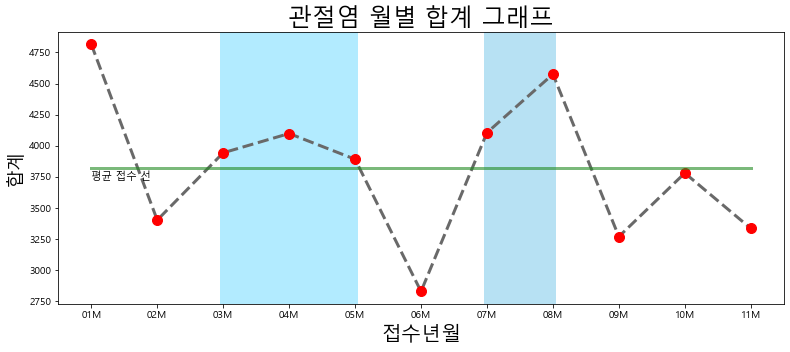

In [15]:
# 관절염 (17, 18, 19, 20합)
dd = pd.DataFrame(a.iloc[:, 16:19]).reset_index().rename(columns={17:'간질환'})
dd['sum'] = dd['간질환'] + dd[18] + dd[19]

ddmean = []
for i in range(11):
    ddmean.append(dd['sum'].mean())
    
plt.figure(figsize=(13, 5))
plt.plot(dd['접수년월'], dd['sum'], c = 'dimgrey' ,lw=3, ls='--', marker='o',ms=10,mec='r',mfc='r')

plt.plot(dd['접수년월'],ddmean,c='forestgreen',lw=3,alpha=0.6)
plt.text(201901,ddmean[0]-100,'평균 접수 선', fontsize=10.5)

plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.title("관절염 월별 합계 그래프",fontsize=24)
plt.ylabel('합계', fontsize=18) 
# plt.yticks([]) # yticks label 제거하고 싶으면 사용
plt.xlabel('접수년월', fontsize=20)
plt.axvspan(201902.95, 201905.05, facecolor='deepskyblue', alpha=0.3)
plt.axvspan(201906.95, 201908.05, facecolor='skyblue', alpha=0.6)
plt.show()

## <<7~8월 사이에 마킹 필요 >>

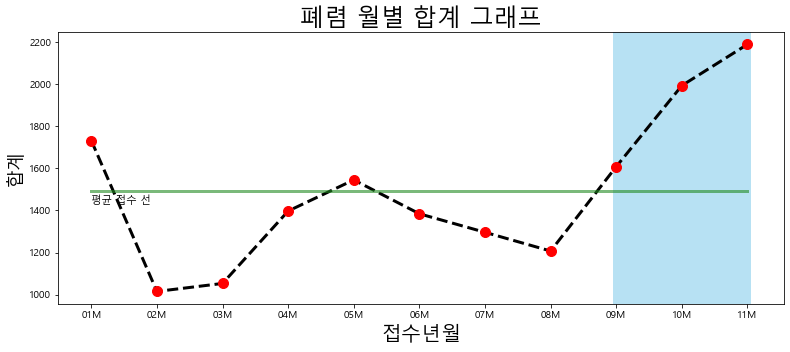

In [16]:
# 폐렴
dd = pd.DataFrame(a.iloc[:, 10:11]).reset_index()

dd11mean = []
for i in range(11):
    dd11mean.append(dd[11].mean())
plt.figure(figsize=(13, 5))
# sns.pointplot(data=dd, x='접수년월', y=11)
plt.plot(dd['접수년월'],dd[11], c = 'black' ,lw=3, ls='--', marker='o',ms=10,mec='r',mfc='r')
plt.plot(dd['접수년월'],dd11mean,c='forestgreen',lw=3,alpha=0.6)
plt.text(201901,dd11mean[0]-60,'평균 접수 선', fontsize=10.5)
plt.axvspan(201908.95, 201911.05, facecolor='skyblue', alpha=0.6)
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.title("폐렴 월별 합계 그래프",fontsize=24)
plt.ylabel('합계', fontsize=18) 
# plt.yticks([]) # yticks label 제거하고 싶으면 활용 
plt.xlabel('접수년월', fontsize=20)
plt.show()

## 겨울과 환절기에 증가하는걸 표현해야하는데 그래서 음영이 다른색으로 2개가 들어갔으면 좋겠음
## 사실 근데 어떻게 해야할지 감이 안잡히긴함(겨울이 잘 안나타있어서)
## 그래서 아님 환절기(4~5월, 8~9월 등?)만 음영 넣는것도 괜찮을듯

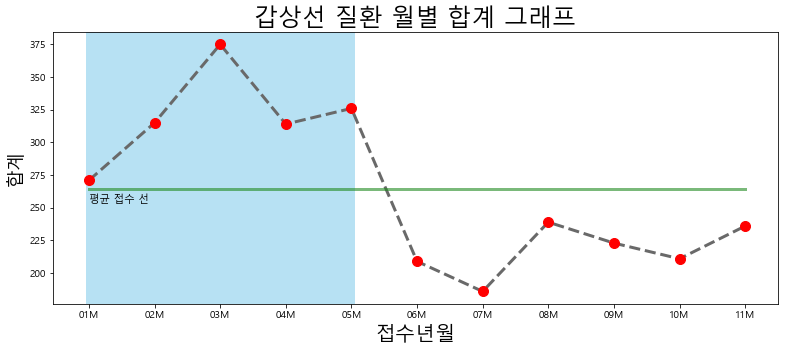

In [18]:
# 갑상선암
dd = pd.DataFrame(a.iloc[:, 9:10]).reset_index()

dd10mean = []
for i in range(11):
    dd10mean.append(dd[10].mean())
    
plt.figure(figsize=(13, 5))
plt.plot(dd['접수년월'],dd[10], c = 'dimgrey' ,lw=3, ls='--', marker='o',ms=10,mec='r',mfc='r')
plt.plot(dd['접수년월'],dd10mean,c='forestgreen',lw=3,alpha=0.6)
plt.text(201901,dd10mean[0]-10,'평균 접수 선', fontsize=10.5)
plt.axvspan(201900.95, 201905.05, facecolor='skyblue', alpha=0.6)
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.title("갑상선 질환 월별 합계 그래프",fontsize=24)
plt.ylabel('합계', fontsize=18)
# plt.yticks([]) # yticks label 제거하고 싶으면 활용 
plt.xlabel('접수년월', fontsize=20)
plt.show()

# 봄에 증가함을 보여주기 위해 2~3월 사이 음영 필요

In [26]:
dd[10]/train.groupby('접수년월')['KCD등급코드'].count().reset_index()['KCD등급코드']

0     0.006915
1     0.010381
2     0.011288
3     0.008733
4     0.009528
5     0.006755
6     0.005201
7     0.006853
8     0.006912
9     0.005827
10    0.006751
dtype: float64

In [ ]:
train.groupby(['접수년월',''])

Text(0.5, 0, '접수년월')

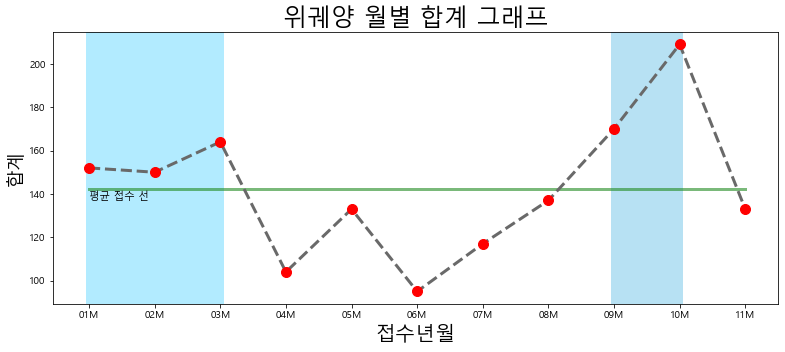

In [12]:
dd = pd.DataFrame(a.iloc[:, 12:14]).reset_index()
# dd[13] = dd[13]/1564
# dd[14] = dd[14]/520

dd13mean = []
dd14mean = []
for i in range(11):
    dd13mean.append(dd[13].mean())
    dd14mean.append(dd[14].mean())

plt.figure(figsize=(13, 5))

plt.plot(dd['접수년월'],dd13mean,c='forestgreen',lw=3,alpha=0.6)
plt.text(201901,dd13mean[0]-5,'평균 접수 선', fontsize=10.5)
plt.plot(dd['접수년월'],dd[13], c = 'dimgrey' ,lw=3, ls='--', marker='o',ms=10,mec='r',mfc='r')
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.axvspan(201900.95, 201903.05, facecolor='deepskyblue', alpha=0.3)
plt.axvspan(201908.95, 201910.05, facecolor='skyblue', alpha=0.6)
plt.title("위궤양 월별 합계 그래프",fontsize=24)
plt.ylabel('합계', fontsize=18)
# plt.yticks([]) # yticks label 제거하고 싶으면 활용 
plt.xlabel('접수년월', fontsize=20)

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


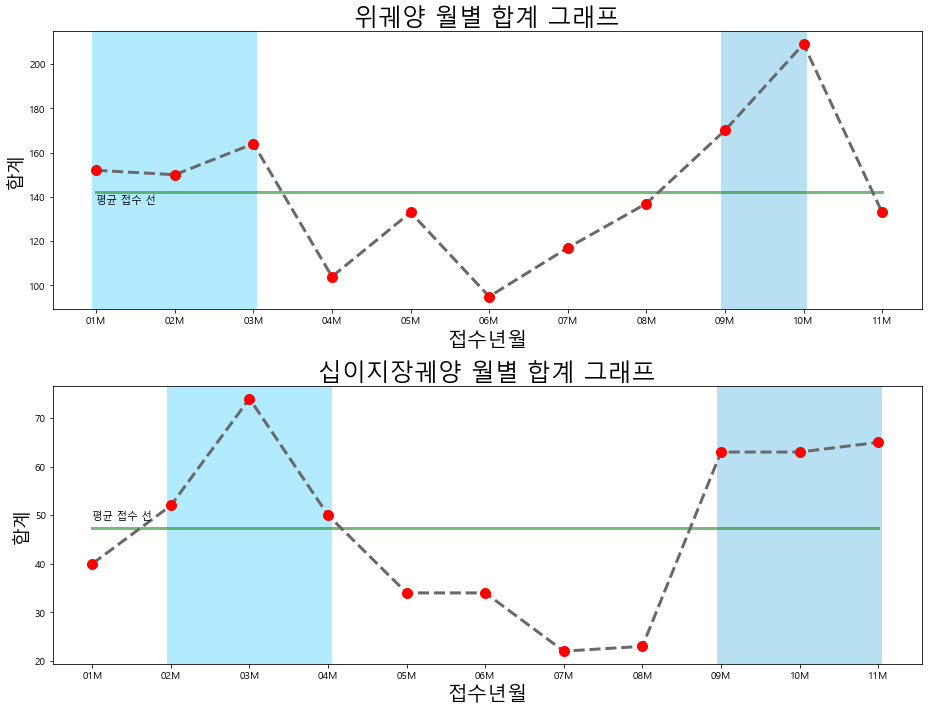

In [210]:
dd = pd.DataFrame(a.iloc[:, 12:14]).reset_index()
# dd[13] = dd[13]/1564
# dd[14] = dd[14]/520

dd13mean = []
dd14mean = []
for i in range(11):
    dd13mean.append(dd[13].mean())
    dd14mean.append(dd[14].mean())

plt.figure(figsize=(13, 10))

dd = pd.DataFrame(a.iloc[:, 12:14]).reset_index()
ax1 = plt.subplot(211)

plt.plot(dd['접수년월'],dd13mean,c='forestgreen',lw=3,alpha=0.6)
plt.text(201901,dd13mean[0]-5,'평균 접수 선', fontsize=10.5)
plt.plot(dd['접수년월'],dd[13], c = 'dimgrey' ,lw=3, ls='--', marker='o',ms=10,mec='r',mfc='r')
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.axvspan(201900.95, 201903.05, facecolor='deepskyblue', alpha=0.3)
plt.axvspan(201908.95, 201910.05, facecolor='skyblue', alpha=0.6)
plt.title("위궤양 월별 합계 그래프",fontsize=24)
plt.ylabel('합계', fontsize=18)
# plt.yticks([]) # yticks label 제거하고 싶으면 활용 
plt.xlabel('접수년월', fontsize=20)
print(ax1)

ax2 = plt.subplot(212)

plt.plot(dd['접수년월'],dd14mean,c='forestgreen',lw=3,alpha=0.6)
plt.text(201901,dd14mean[0]+2,'평균 접수 선', fontsize=10.5)
plt.plot(dd['접수년월'],dd[14], c = 'dimgrey' ,lw=3, ls='--', marker='o',ms=10,mec='r',mfc='r')
plt.xticks([201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911],['01M','02M','03M','04M','05M','06M','07M','08M','09M','10M','11M'])
plt.axvspan(201901.95, 201904.05, facecolor='deepskyblue', alpha=0.3)
plt.axvspan(201908.95, 201911.05, facecolor='skyblue', alpha=0.6)
plt.title("십이지장궤양 월별 합계 그래프",fontsize=24)
plt.ylabel('합계', fontsize=18)
# plt.yticks([]) # yticks label 제거하고 싶으면 활용 
plt.xlabel('접수년월', fontsize=20)
print(ax2)

plt.tight_layout()

No handles with labels found to put in legend.


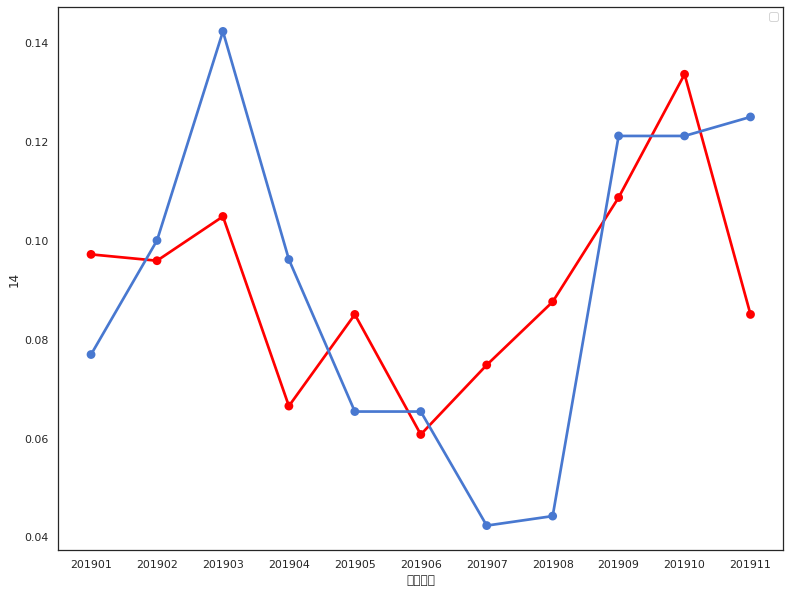

In [456]:
# 의궤양/십이지장궤양 
dd = pd.DataFrame(a.iloc[:, 12:14]).reset_index()
dd[13] = dd[13]/1564
dd[14] = dd[14]/520

plt.figure(figsize=(13, 10))
sns.pointplot(data=dd, x='접수년월', y=13, color='red')
sns.pointplot(data=dd, x='접수년월', y=14)
plt.legend()
plt.show()

## <봄 가을에 증가하는걸 보여줘야하므로, 2~4월, 9~10월 음영 필요>

# 여기부턴 무시

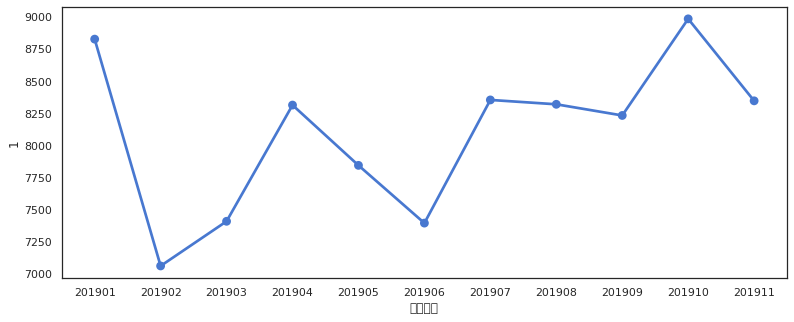

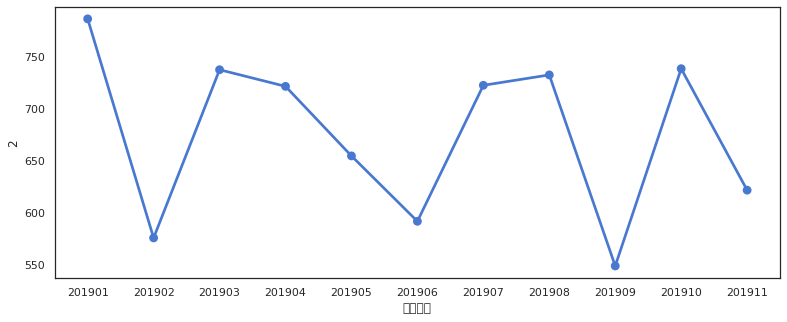

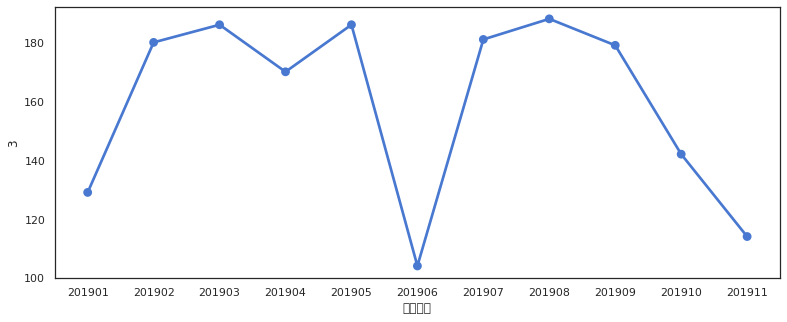

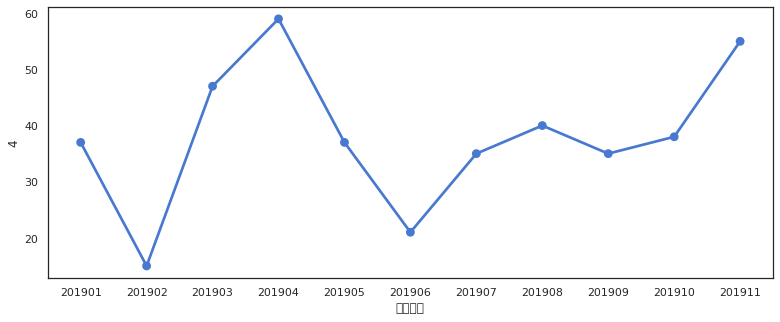

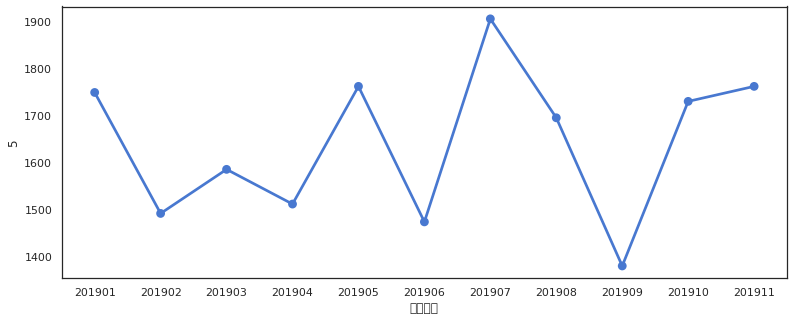

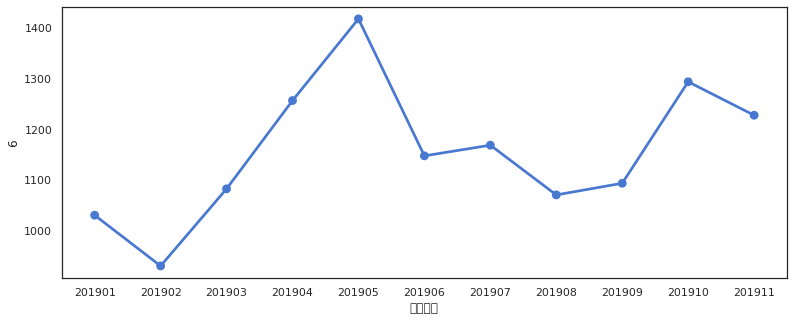

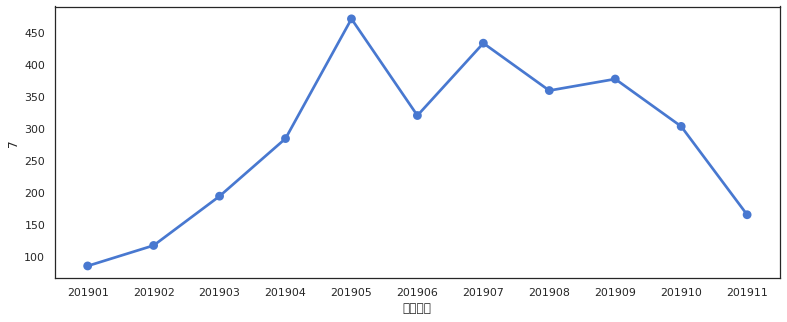

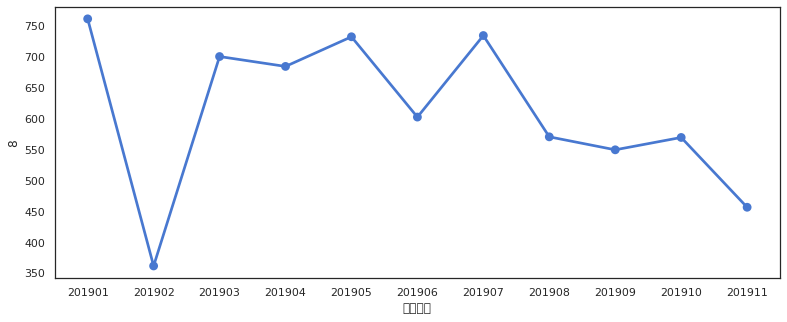

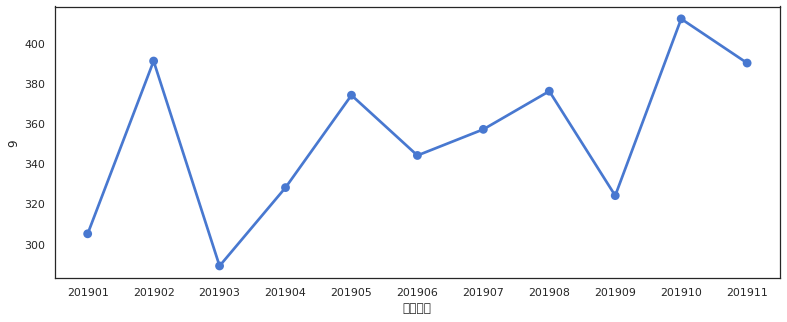

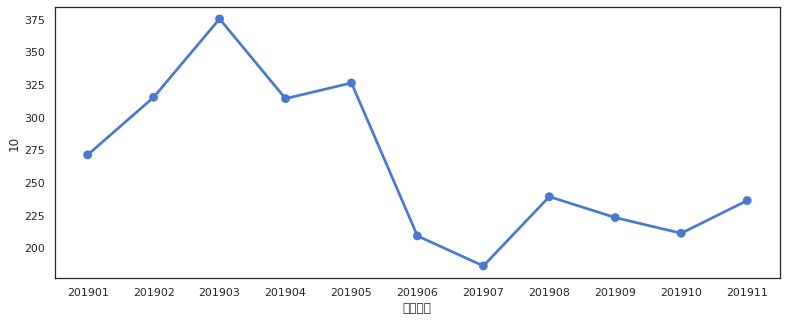

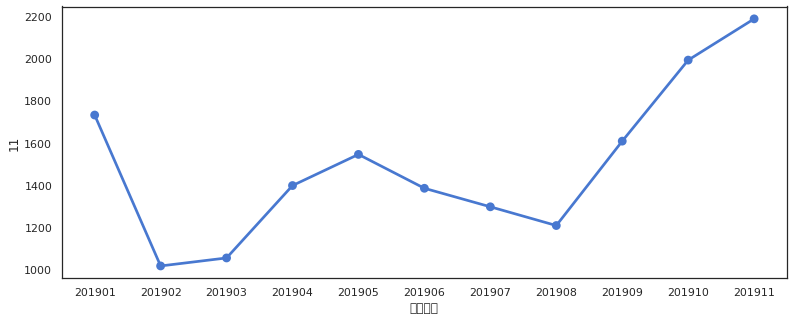

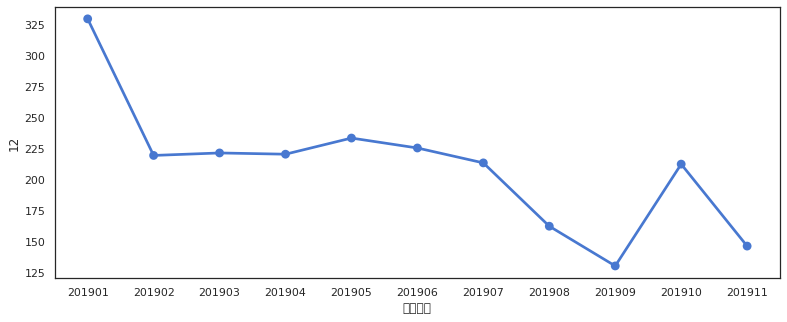

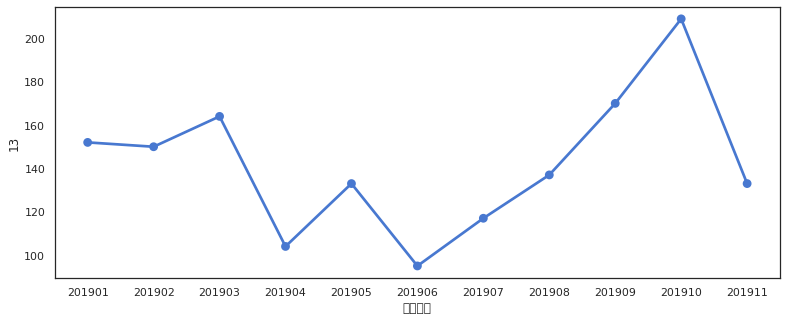

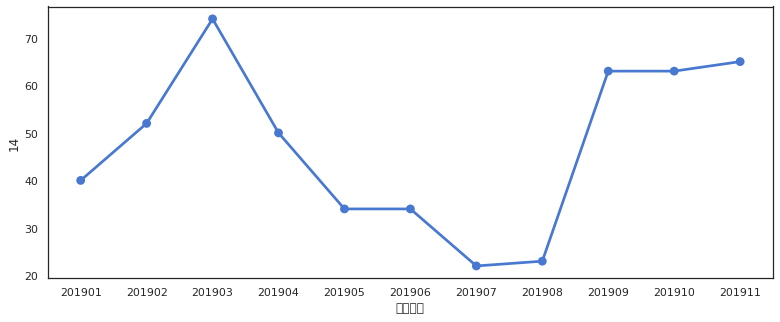

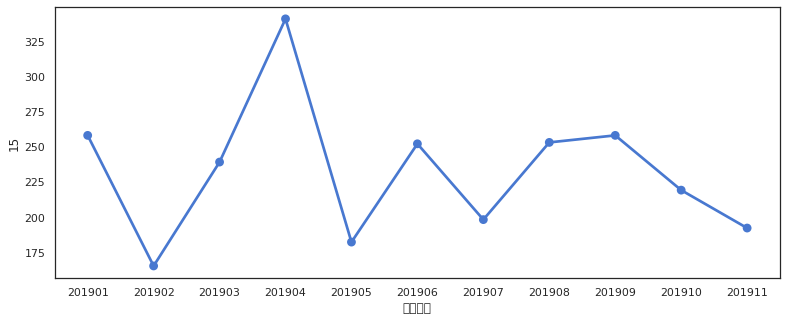

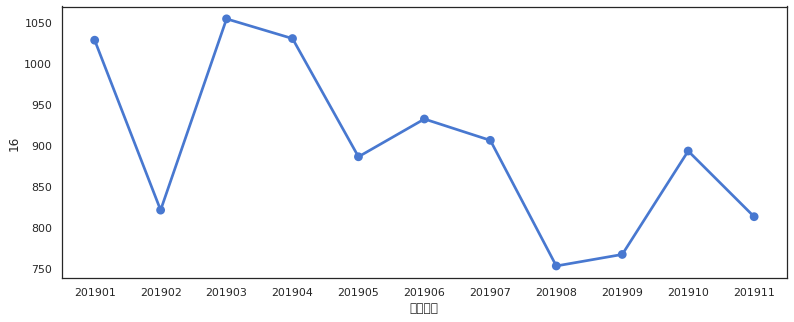

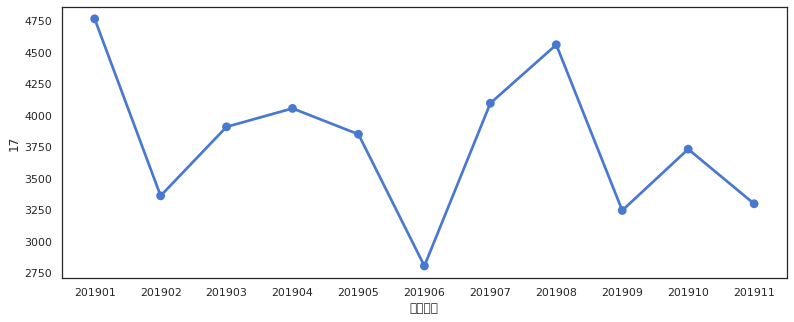

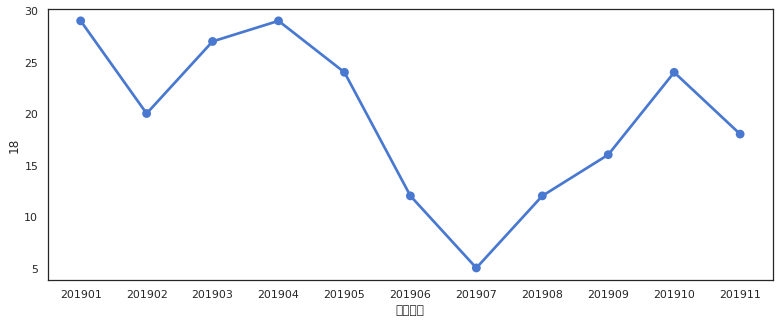

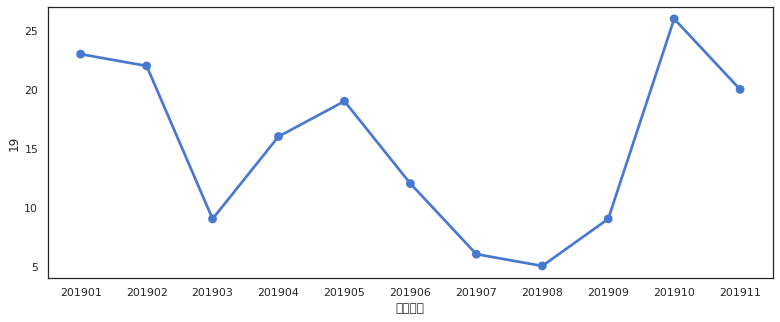

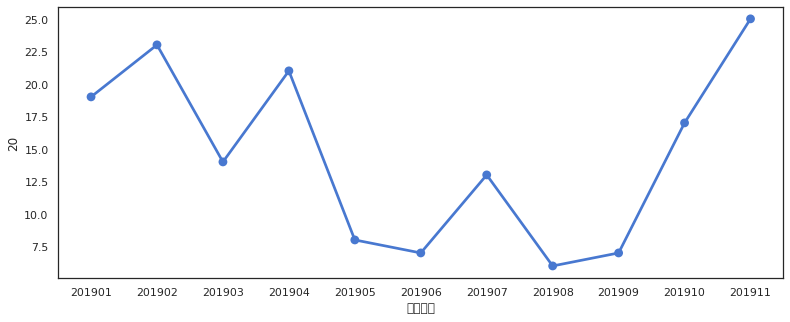

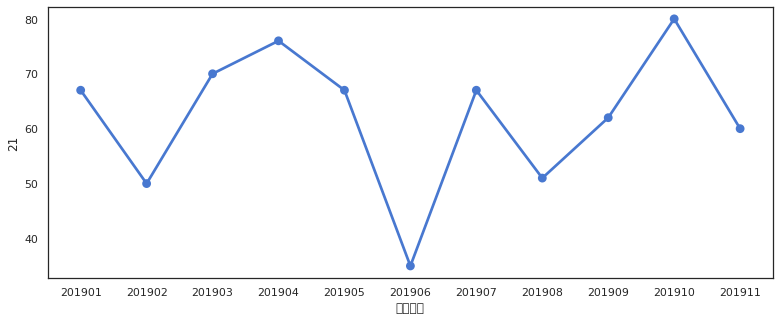

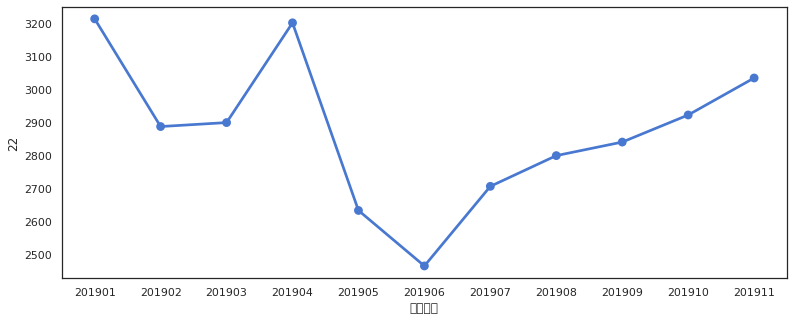

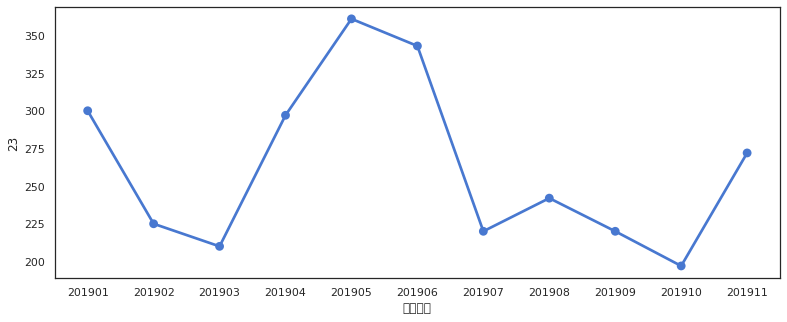

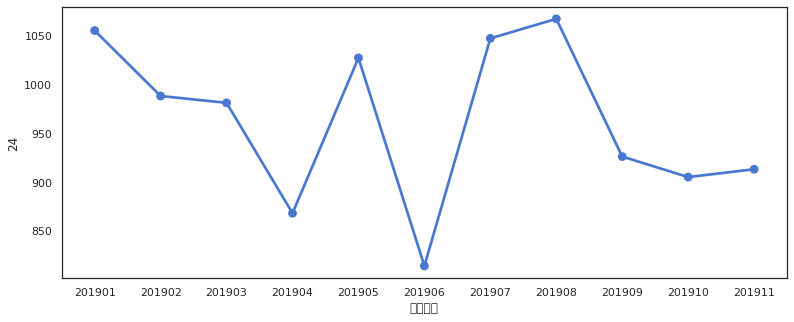

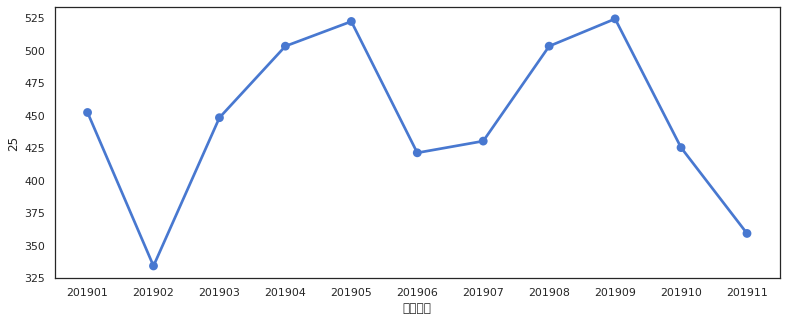

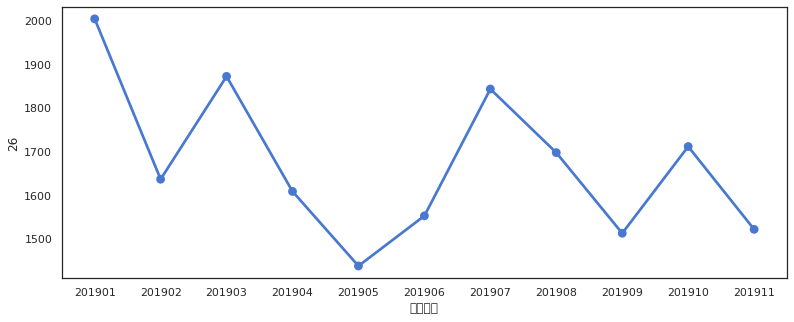

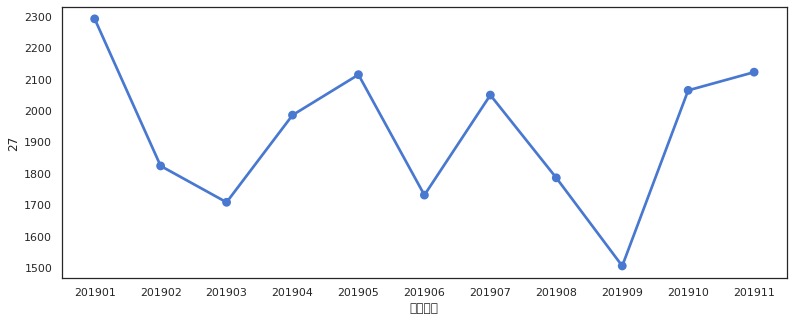

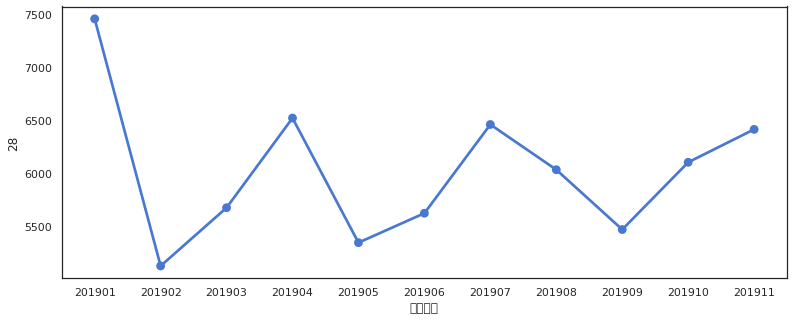

In [445]:
for i in range(28):
  dd = pd.DataFrame(a.iloc[:, i:i+1]).reset_index()
  plt.figure(figsize=(13, 5))
  sns.pointplot(data=dd, x='접수년월', y=i+1)
  plt.show()

In [446]:
# import seaborn as sns
# sns.barplot(data=aaa, x='해당 청구보험금', y='비율')

In [447]:
# import seaborn as sns
# sns.barplot(data=bb.head(10), x='해당 가입금액', y='비율')

In [448]:
# 의궤양/십이지장궤양 
dd = pd.DataFrame(a.iloc[:, 12:14]).reset_index()

In [450]:
dd[13] = dd[13]/1564
dd[14] = dd[14]/520

No handles with labels found to put in legend.


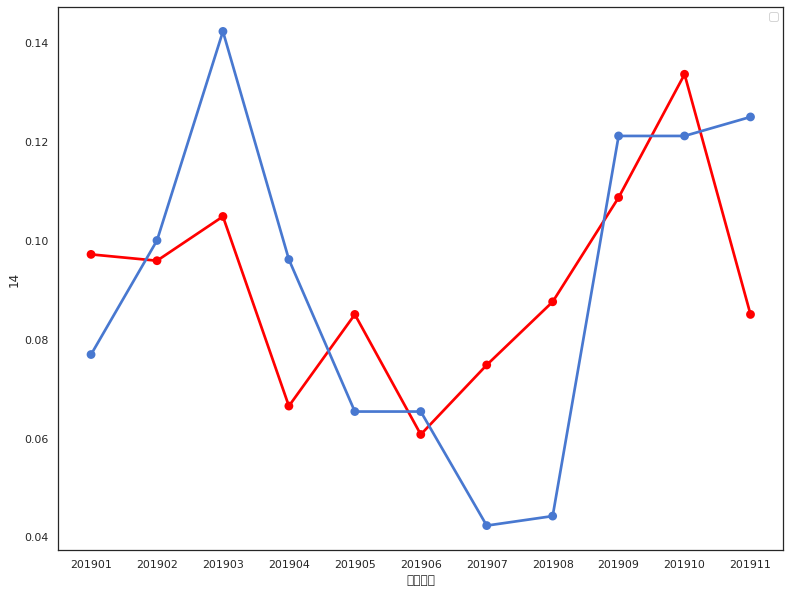

In [453]:
plt.figure(figsize=(13, 10))
sns.pointplot(data=dd, x='접수년월', y=13, color='red')
sns.pointplot(data=dd, x='접수년월', y=14)
plt.legend()
plt.show()

# Modeling


In [54]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.metrics import accuracy_score

# train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv',encoding='cp949')
# X_tr = train.query('base_ym==201910').drop(['target'], axis=1)
# y_tr = train.query('base_ym==201910')['target']
# X_te = train.query('base_ym==201911').drop(['target'], axis=1)
# y_te = train.query('base_ym==201911')['target']

# print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

In [55]:
# classifiers = [
#     DecisionTreeClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(reg_param=0.5)]

# for clf in classifiers:
#     name = clf.__class__.__name__
#     clf.fit(X_tr, y_tr)
#     pred = clf.predict(X_te)
#     score = accuracy_score(pred, y_te)
#     print(accurracy, name, score)

In [56]:
data.columns

Index(['접수년월', '질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
       '의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
       '중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드', '통원횟수',
       '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드', '병원별평균입원청구보험금',
       '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금', '질병별평균입원청구보험금',
       '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금', '입원청구건수', '수술청구건수',
       '통원청구건수', 'target', '행위_입원', '행위_통원', '행위_수술', '행위_진단', '병원대비청구보험금',
       '병원별_평균_청구액', '질병별_평균_청구액', '청구-질병평균청구', 'm2', 'diffs2'],
      dtype='object')

In [57]:
# # knn전용
# drop_col = ['건강인우대계약가입여부','요양병원여부','중도부가계약여부','행위_입원','행위_통원','행위_수술','행위_진단', '질병청구합', '병원청구합', 
#             '질병구분평균', '가입금액평균', '보험료구간평균','발생지역평균', '고객나이평균' ]
            
# X_train = data.iloc[:train.shape[0],:].drop(drop_col,axis=1)
# y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv',encoding='cp949').query("base_ym == 201911").target
# X_test = data.iloc[train.shape[0]:,:].drop(drop_col, axis=1)

In [58]:
# extra 전용
X_train = data.iloc[:train.shape[0],:].drop(['건강인우대계약가입여부','요양병원여부','중도부가계약여부','행위_입원','행위_통원','행위_수술','행위_진단', 'm2', '접수년월'],axis=1)
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv',encoding='cp949').query("base_ym == 201911").target
# y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv',encoding='cp949').target
X_test = data.iloc[train.shape[0]:,:].drop(['건강인우대계약가입여부','요양병원여부','중도부가계약여부','행위_입원','행위_통원','행위_수술','행위_진단', 'm2', '접수년월'],axis=1)

In [59]:
# X_train = data.iloc[:train.shape[0],:]
# y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/train.csv',encoding='cp949').query("base_ym == 201911").target
# X_test = data.iloc[train.shape[0]:,:]

In [60]:
X_train

,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,diffs2
0,1,3,1,1,12,2,3,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,1,1.3084,1.7324,2.4614,-2.0374,1.151986
1,3,8,22,4,2,1,4,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0,0.2832,0.5770,0.1508,0.7094,0.697374
2,3,8,22,1,2,1,4,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,1,0.1416,0.2885,0.1508,0.2793,1.660216
3,3,8,23,2,8,2,9,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,1,0.3129,0.5638,0.1920,0.0589,0.755155
4,3,8,23,9,8,2,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,1,0.4141,0.4464,0.1920,-0.1597,1.174042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34955,1,3,1,4,4,3,2,0,0,0,1,3,17.0000,1.0968,0.0000,6,6,1.1293,2.1051,1.9294,1.2783,1.6458,1.1708,1.1419,1.0639,0.0000,0.0,1.0,1,1.0083,2.1051,1.1708,-0.0740,0.212274
34956,3,4,28,5,10,2,9,0,0,0,1,4,0.0000,0.5806,0.3333,6,0,0.6801,0.0000,0.4147,0.3169,0.1359,0.0000,0.1419,0.0000,0.6667,1.0,0.0,1,0.5142,1.0948,0.2778,0.3028,0.755728
34957,3,14,26,5,10,2,2,0,0,0,1,6,0.0000,0.1577,0.1111,5,0,0.5249,0.0000,0.1923,0.0000,0.2200,0.0000,0.1943,0.0000,1.3333,4.0,0.0,1,0.5595,0.7172,0.4143,-0.2566,0.721342
34958,2,5,10,2,8,2,2,0,0,0,1,4,0.0000,0.3226,0.5833,6,0,1.2443,0.1014,0.0000,0.0000,0.6907,0.0000,0.5999,0.0000,0.6667,0.0,0.0,1,0.9217,1.2443,0.6907,-0.3681,0.674210


In [61]:
print(X_train.shape, y_train.shape)

(34960, 34) (34960,)


In [62]:
y_train = pd.DataFrame(y_train, columns=['target'])

In [63]:
y_train = y_train.reset_index().drop(['index'], axis=1)

In [64]:
y_train

,target
0,1
1,1
2,1
3,1
4,1
...,...
34955,2
34956,2
34957,2
34958,2


In [65]:
X = pd.concat([X_train, y_train], axis=1)

In [66]:
X

,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,diffs2,target
0,1,3,1,1,12,2,3,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,1,1.3084,1.7324,2.4614,-2.0374,1.151986,1
1,3,8,22,4,2,1,4,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0,0.2832,0.5770,0.1508,0.7094,0.697374,1
2,3,8,22,1,2,1,4,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,1,0.1416,0.2885,0.1508,0.2793,1.660216,1
3,3,8,23,2,8,2,9,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,1,0.3129,0.5638,0.1920,0.0589,0.755155,1
4,3,8,23,9,8,2,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,1,0.4141,0.4464,0.1920,-0.1597,1.174042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34955,1,3,1,4,4,3,2,0,0,0,1,3,17.0000,1.0968,0.0000,6,6,1.1293,2.1051,1.9294,1.2783,1.6458,1.1708,1.1419,1.0639,0.0000,0.0,1.0,1,1.0083,2.1051,1.1708,-0.0740,0.212274,2
34956,3,4,28,5,10,2,9,0,0,0,1,4,0.0000,0.5806,0.3333,6,0,0.6801,0.0000,0.4147,0.3169,0.1359,0.0000,0.1419,0.0000,0.6667,1.0,0.0,1,0.5142,1.0948,0.2778,0.3028,0.755728,2
34957,3,14,26,5,10,2,2,0,0,0,1,6,0.0000,0.1577,0.1111,5,0,0.5249,0.0000,0.1923,0.0000,0.2200,0.0000,0.1943,0.0000,1.3333,4.0,0.0,1,0.5595,0.7172,0.4143,-0.2566,0.721342,2
34958,2,5,10,2,8,2,2,0,0,0,1,4,0.0000,0.3226,0.5833,6,0,1.2443,0.1014,0.0000,0.0000,0.6907,0.0000,0.5999,0.0000,0.6667,0.0,0.0,1,0.9217,1.2443,0.6907,-0.3681,0.674210,2


In [67]:
X.columns

Index(['질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드', '의료기관구분코드',
       '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부', '보험사기이력고객여부', '보험료구간코드',
       '가입금액구간코드', '통원횟수', '청구보험금', '입원일수', '청구일계약일간기간구분코드', '청구일부활일간기간구분코드',
       '병원별평균입원청구보험금', '병원별평균통원청구보험금', '병원별평균수술청구보험금', '병원별평균진단청구보험금',
       '질병별평균입원청구보험금', '질병별평균통원청구보험금', '질병별평균수술청구보험금', '질병별평균진단청구보험금',
       '입원청구건수', '수술청구건수', '통원청구건수', 'target', '병원대비청구보험금', '병원별_평균_청구액',
       '질병별_평균_청구액', '청구-질병평균청구', 'diffs2', 'target'],
      dtype='object')

In [68]:
# d = X.groupby(['질병구분코드'])['target'].mean().to_dict()
# X['질병구분_target_me'] = X['질병구분코드'].apply(lambda x: d.get(x))
# X_test['청구보험_target_me'] = X_test['청구보험금'].apply(lambda x: d.get(x))

# d = X.groupby(['치료행위코드'])['target'].mean().to_dict()
# X['치료_target_me'] = X['치료행위코드'].apply(lambda x: d.get(x))
# X_test['치료_target_me'] = X_test['치료행위코드'].apply(lambda x: d.get(x))



In [69]:
X

,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,diffs2,target
0,1,3,1,1,12,2,3,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,1,1.3084,1.7324,2.4614,-2.0374,1.151986,1
1,3,8,22,4,2,1,4,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0,0.2832,0.5770,0.1508,0.7094,0.697374,1
2,3,8,22,1,2,1,4,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,1,0.1416,0.2885,0.1508,0.2793,1.660216,1
3,3,8,23,2,8,2,9,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,1,0.3129,0.5638,0.1920,0.0589,0.755155,1
4,3,8,23,9,8,2,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,1,0.4141,0.4464,0.1920,-0.1597,1.174042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34955,1,3,1,4,4,3,2,0,0,0,1,3,17.0000,1.0968,0.0000,6,6,1.1293,2.1051,1.9294,1.2783,1.6458,1.1708,1.1419,1.0639,0.0000,0.0,1.0,1,1.0083,2.1051,1.1708,-0.0740,0.212274,2
34956,3,4,28,5,10,2,9,0,0,0,1,4,0.0000,0.5806,0.3333,6,0,0.6801,0.0000,0.4147,0.3169,0.1359,0.0000,0.1419,0.0000,0.6667,1.0,0.0,1,0.5142,1.0948,0.2778,0.3028,0.755728,2
34957,3,14,26,5,10,2,2,0,0,0,1,6,0.0000,0.1577,0.1111,5,0,0.5249,0.0000,0.1923,0.0000,0.2200,0.0000,0.1943,0.0000,1.3333,4.0,0.0,1,0.5595,0.7172,0.4143,-0.2566,0.721342,2
34958,2,5,10,2,8,2,2,0,0,0,1,4,0.0000,0.3226,0.5833,6,0,1.2443,0.1014,0.0000,0.0000,0.6907,0.0000,0.5999,0.0000,0.6667,0.0,0.0,1,0.9217,1.2443,0.6907,-0.3681,0.674210,2


In [70]:
X_train = X.drop(['target'], axis=1)
y_train = X['target']

In [71]:
X_test.isnull().sum()

질병경중등급코드          0
KCD등급코드           0
질병구분코드            0
발생지역구분코드          0
치료행위코드            0
의료기관구분코드          0
고객나이구분코드          0
부담보5년경과여부         0
부실모집설계사계약여부       0
보험사기이력고객여부        0
보험료구간코드           0
가입금액구간코드          0
통원횟수              0
청구보험금             0
입원일수              0
청구일계약일간기간구분코드     0
청구일부활일간기간구분코드     0
병원별평균입원청구보험금      0
병원별평균통원청구보험금      0
병원별평균수술청구보험금      0
병원별평균진단청구보험금      0
질병별평균입원청구보험금      0
질병별평균통원청구보험금      0
질병별평균수술청구보험금      0
질병별평균진단청구보험금      0
입원청구건수            0
수술청구건수            0
통원청구건수            0
target            0
병원대비청구보험금         0
병원별_평균_청구액        0
질병별_평균_청구액        0
청구-질병평균청구         0
diffs2           12
dtype: int64

In [72]:
X_train

,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,고객나이구분코드,부담보5년경과여부,부실모집설계사계약여부,보험사기이력고객여부,보험료구간코드,가입금액구간코드,통원횟수,청구보험금,입원일수,청구일계약일간기간구분코드,청구일부활일간기간구분코드,병원별평균입원청구보험금,병원별평균통원청구보험금,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,병원대비청구보험금,병원별_평균_청구액,질병별_평균_청구액,청구-질병평균청구,diffs2
0,1,3,1,1,12,2,3,0,0,0,1,4,0.8571,0.4240,0.3452,6,0,1.6021,0.1303,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,1.3084,1.7324,2.4614,-2.0374,1.151986
1,3,8,22,4,2,1,4,0,0,0,1,4,0.0000,0.8602,0.0000,6,0,0.0000,0.0000,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0.2832,0.5770,0.1508,0.7094,0.697374
2,3,8,22,1,2,1,4,0,0,1,1,6,0.0000,0.4301,0.0000,6,0,0.0000,0.0000,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0.1416,0.2885,0.1508,0.2793,1.660216
3,3,8,23,2,8,2,9,0,0,0,1,6,0.0000,0.2509,0.8056,4,0,0.5638,0.0197,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,0.3129,0.5638,0.1920,0.0589,0.755155
4,3,8,23,9,8,2,0,0,0,0,2,2,0.0000,0.0323,0.4167,5,0,0.4464,0.0000,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,0.4141,0.4464,0.1920,-0.1597,1.174042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34955,1,3,1,4,4,3,2,0,0,0,1,3,17.0000,1.0968,0.0000,6,6,1.1293,2.1051,1.9294,1.2783,1.6458,1.1708,1.1419,1.0639,0.0000,0.0,1.0,1.0083,2.1051,1.1708,-0.0740,0.212274
34956,3,4,28,5,10,2,9,0,0,0,1,4,0.0000,0.5806,0.3333,6,0,0.6801,0.0000,0.4147,0.3169,0.1359,0.0000,0.1419,0.0000,0.6667,1.0,0.0,0.5142,1.0948,0.2778,0.3028,0.755728
34957,3,14,26,5,10,2,2,0,0,0,1,6,0.0000,0.1577,0.1111,5,0,0.5249,0.0000,0.1923,0.0000,0.2200,0.0000,0.1943,0.0000,1.3333,4.0,0.0,0.5595,0.7172,0.4143,-0.2566,0.721342
34958,2,5,10,2,8,2,2,0,0,0,1,4,0.0000,0.3226,0.5833,6,0,1.2443,0.1014,0.0000,0.0000,0.6907,0.0000,0.5999,0.0000,0.6667,0.0,0.0,0.9217,1.2443,0.6907,-0.3681,0.674210


In [73]:
print(X_train.shape, y_train.shape, X_test.shape)

(34960, 33) (34960, 2) (365040, 34)


In [74]:
from sklearn.model_selection import train_test_split
tr_x, val_x, tr_y, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=6)
print(tr_x.shape, val_x.shape, tr_y.shape, val_y.shape)

(27968, 33) (6992, 33) (27968, 2) (6992, 2)


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
# ext = ExtraTreesClassifier(n_jobs = 3, n_estimators= 1500,verbose=1,random_state = 0)
# ext = ExtraTreesClassifier(n_jobs = 3, n_estimators= 1500,verbose=1,random_state = 5187)
model = ExtraTreesClassifier(n_jobs = 5, n_estimators= 450,verbose=1,random_state = 1255, max_features='auto')
model.fit(tr_x, tr_y)
# y_pred = model.predict_proba(val_x)
y_pred = model.predict(val_x)

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=2,n_jobs=-1,weights='distance',metric='manhattan')
# model.fit(X_train,y_train)
# y_pred = model.predict_proba(X_test)

ValueError: ignored

In [ ]:
# valid
target_names = ['자동지급', '심사', '조사']
from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred, target_names = target_names))

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# ext = ExtraTreesClassifier(n_jobs = 3, n_estimators= 1500,verbose=1,random_state = 0)
# ext = ExtraTreesClassifier(n_jobs = 3, n_estimators= 1500,verbose=1,random_state = 5187)
model1 = ExtraTreesClassifier(n_jobs = 5, n_estimators= 450,verbose=1,random_state =5187, max_features='auto')
model2 = ExtraTreesClassifier(n_jobs = 5, n_estimators= 450,verbose=1,random_state =113, max_features='auto')
model3 = ExtraTreesClassifier(n_jobs = 5, n_estimators= 450,verbose=1,random_state =11333, max_features='auto')

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
# y_pred = model.predict_proba(val_x)
y_pred1 = model1.predict_proba(X_test)
y_pred2 = model2.predict_proba(X_test)
y_pred3 = model3.predict_proba(X_test)

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=2,n_jobs=-1,weights='distance',metric='manhattan')
# model.fit(X_train,y_train)
# y_pred = model.predict_proba(X_test)

In [ ]:
y_pred = y_pred1 + y_pred2 + y_pred3

In [ ]:
y_pred

In [ ]:
y_pred1 = pd.DataFrame(y_pred)

y_pred_1 = [np.argmax(line) for line in np.array(y_pred1)]

sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/data/sample.csv')
sub['target'] = y_pred_1
sub.to_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/sub/1003ex.csv',index=False)

from google.colab import files
files.download('/content/drive/My Drive/Colab Notebooks/미래에셋/sub/1003ex.csv') # knn 85.5452(0.01오름)

In [ ]:
sub

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
from sklearn.model_selection import StratifiedKFold

k = 5
seed = 1111

oof_train = np.zeros((len(X_train), 3))
oof_test = np.zeros((len(X_test), 3))
score_list = []

cv = StratifiedKFold(n_splits = k , random_state = seed, shuffle=True)

for i, (tr_idx, val_idx) in enumerate(cv.split(X_train, y_train)):

  print(f"{i}번째 Fold 시작")
  trn_x, trn_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
  val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

  model = ExtraTreesClassifier(n_jobs = 5, n_estimators= 450*(i+1) ,verbose=1,random_state =10*i+1, max_features='auto')
  model.fit(trn_x, trn_y)

  oof_test += model.predict_proba(X_test) / k


In [ ]:
oof_test

In [ ]:
oof_test.shape

In [ ]:
y_pred1 = pd.DataFrame(oof_test)

y_pred_1 = [np.argmax(line) for line in np.array(y_pred1)]

sub['target'] = y_pred_1

sub['target'] = y_pred
sub.to_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/sub/1003excv.csv',index=False)

from google.colab import files
files.download('/content/drive/My Drive/Colab Notebooks/미래에셋/sub/1003excv.csv') 

In [ ]:
# extra 랜덤시드 종합

oof_test = np.zeros((len(X_test), 3))
N = 5

for i in range(N):

  print(f"{i}번째 RANDOM SEED 시작")
  model = ExtraTreesClassifier(n_jobs = 5, n_estimators= 450, verbose=1,random_state =10*(i+1), max_features='auto')
  model.fit(X_train, y_train)

  oof_test += model.predict_proba(X_test) / N


In [ ]:
oof_test

In [ ]:
y_pred1 = pd.DataFrame(oof_test)

y_pred_1 = [np.argmax(line) for line in np.array(y_pred1)]

sub['target'] = y_pred_1

sub['target'] = y_pred
sub.to_csv('/content/drive/My Drive/Colab Notebooks/미래에셋/sub/1003excv.csv',index=False)

from google.colab import files
files.download('/content/drive/My Drive/Colab Notebooks/미래에셋/sub/1003excv.csv') 

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model2 = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,weights='distance',metric='manhattan')
# model2.fit(X_train,y_train)
# y_pred2 = model2.predict_proba(X_test) # knn 두개하면 떨어짐. 
# from sklearn.neighbors import KNeighborsClassifier
# model3 = KNeighborsClassifier(n_neighbors=10,n_jobs=-1,weights='distance',metric='manhattan')
# model3.fit(X_train,y_train)
# y_pred3 = model3.predict_proba(X_test)
# from sklearn.neighbors import KDTree
# model = KDTree(X_train, leaf_size=15, metric = 'manhattan')